In [2]:
#import libraries
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import pandas as pd
import numpy as np
from matplotlib.pyplot import figure

In [3]:
#take a look at the data
df = pd.read_csv('movies.csv')
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [4]:
#let's see if there is any missing data
df.isnull().sum()

name           0
rating        77
genre          0
year           0
released       2
score          3
votes          3
director       0
writer         3
star           1
country        3
budget      2171
gross        189
company       17
runtime        4
dtype: int64

In [5]:
#deleting the missing data
data_no_mv = df.dropna(axis = 0)
data_no_mv.isnull().sum()

name        0
rating      0
genre       0
year        0
released    0
score       0
votes       0
director    0
writer      0
star        0
country     0
budget      0
gross       0
company     0
runtime     0
dtype: int64

In [6]:
#data types for our columns
data_no_mv.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object

In [7]:
#change data types fof columns
data_no_mv['budget'] = data_no_mv['budget'].astype('int64')
data_no_mv['gross'] = data_no_mv['gross'].astype('int64')
data_no_mv['runtime'] = data_no_mv['runtime'].astype('int64')
data_no_mv.dtypes

C:\Users\macabre\AppData\Local\Temp\ipykernel_8064\1866230085.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_no_mv['budget'] = data_no_mv['budget'].astype('int64')
C:\Users\macabre\AppData\Local\Temp\ipykernel_8064\1866230085.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_no_mv['gross'] = data_no_mv['gross'].astype('int64')
C:\Users\macabre\AppData\Local\Temp\ipykernel_8064\1866230085.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try us

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget        int64
gross         int64
company      object
runtime       int64
dtype: object

In [8]:
#with this code we can see every single data in the dataset ""pd.set_option('display.max_rows' , None)""

In [9]:
data_no_mv = data_no_mv.sort_values(by = ['gross'] , ascending = False)

In [10]:
data_no_mv.drop_duplicates()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
5445,Avatar,PG-13,Action,2009,"December 18, 2009 (United States)",7.8,1100000.0,James Cameron,James Cameron,Sam Worthington,United States,237000000,2847246203,Twentieth Century Fox,162
7445,Avengers: Endgame,PG-13,Action,2019,"April 26, 2019 (United States)",8.4,903000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000,2797501328,Marvel Studios,181
3045,Titanic,PG-13,Drama,1997,"December 19, 1997 (United States)",7.8,1100000.0,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000,2201647264,Twentieth Century Fox,194
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,"December 18, 2015 (United States)",7.8,876000.0,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000,2069521700,Lucasfilm,138
7244,Avengers: Infinity War,PG-13,Action,2018,"April 27, 2018 (United States)",8.4,897000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2048359754,Marvel Studios,149
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5640,Tanner Hall,R,Drama,2009,"January 15, 2015 (Sweden)",5.8,3500.0,Francesca Gregorini,Tatiana von Fürstenberg,Rooney Mara,United States,3000000,5073,Two Prong Lesson,96
2434,Philadelphia Experiment II,PG-13,Action,1993,"June 4, 1994 (South Korea)",4.5,1900.0,Stephen Cornwell,Wallace C. Bennett,Brad Johnson,United States,5000000,2970,Trimark Pictures,97
3681,Ginger Snaps,Not Rated,Drama,2000,"May 11, 2001 (Canada)",6.8,43000.0,John Fawcett,Karen Walton,Emily Perkins,Canada,5000000,2554,Copperheart Entertainment,108
272,Parasite,R,Horror,1982,"March 12, 1982 (United States)",3.9,2300.0,Charles Band,Alan J. Adler,Robert Glaudini,United States,800000,2270,Embassy Pictures,85


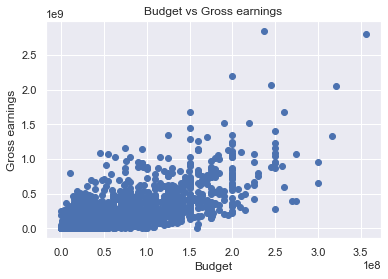

In [11]:
#correlation of data based on their gross

#scatter plot with gross and budget

plt.scatter(data_no_mv['budget'] , data_no_mv['gross'])

plt.title('Budget vs Gross earnings')
plt.xlabel('Budget')
plt.ylabel('Gross earnings')

plt.show()

<AxesSubplot:xlabel='budget', ylabel='gross'>

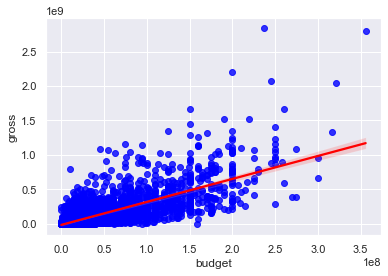

In [12]:
# plot the budget vs gross using seaborn

sns.regplot(x='budget' , y = 'gross' , data = data_no_mv , scatter_kws ={'color':'blue'} , line_kws = {'color': 'red'})

In [20]:
# looking at correlation
cor_matrix = data_no_mv.corr(method = 'pearson')
cor_matrix

,year,score,votes,budget,gross,runtime
year,1.000000,0.056386,0.206021,0.327722,0.274321,0.075077
score,0.056386,1.000000,0.474256,0.072001,0.222556,0.414068
votes,0.206021,0.474256,1.000000,0.439675,0.614751,0.352303
budget,0.327722,0.072001,0.439675,1.000000,0.740247,0.318695
gross,0.274321,0.222556,0.614751,0.740247,1.000000,0.275796
runtime,0.075077,0.414068,0.352303,0.318695,0.275796,1.000000


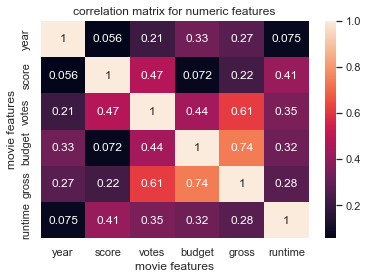

In [22]:
#numeric features

sns.heatmap(cor_matrix, annot = True)

plt.title('correlation matrix for numeric features')
plt.xlabel('movie features')
plt.ylabel('movie features')

plt.show()

In [23]:
#categorical features

numerized_data = data_no_mv.copy()

for col_name in numerized_data.columns:
    if (numerized_data[col_name].dtype == 'object'):
        numerized_data[col_name] = numerized_data[col_name].astype('category')
        numerized_data[col_name] = numerized_data[col_name].cat.codes

numerized_data

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
5445,386,5,0,2009,527,7.8,1100000.0,785,1263,1534,47,237000000,2847246203,1382,162
7445,388,5,0,2019,137,8.4,903000.0,105,513,1470,47,356000000,2797501328,983,181
3045,4909,5,6,1997,534,7.8,1100000.0,785,1263,1073,47,200000000,2201647264,1382,194
6663,3643,5,0,2015,529,7.8,876000.0,768,1806,356,47,245000000,2069521700,945,138
7244,389,5,0,2018,145,8.4,897000.0,105,513,1470,47,321000000,2048359754,983,149
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5640,3794,6,6,2009,890,5.8,3500.0,585,2924,1498,47,3000000,5073,1385,96
2434,2969,5,0,1993,1467,4.5,1900.0,1805,3102,186,47,5000000,2970,1376,97
3681,1595,3,6,2000,1721,6.8,43000.0,952,1683,527,6,5000000,2554,466,108
272,2909,6,9,1982,1525,3.9,2300.0,261,55,1473,47,800000,2270,582,85


In [38]:
correlation = numerized_data.corr(method = 'pearson')
correlation

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
name,1.000000,-0.128668,-0.015578,-0.062435,-0.101901,-0.130337,-0.153735,-0.063177,-0.064415,-0.095033,-0.133885,-0.086191,-0.122699,-0.053169,-0.145226
rating,-0.128668,1.000000,0.342849,-0.169593,-0.032135,-0.004539,-0.271714,-0.039108,-0.060567,-0.038854,-0.082350,-0.517743,-0.500703,-0.331018,0.026735
genre,-0.015578,0.342849,1.000000,-0.341845,0.013816,-0.117652,-0.513913,-0.016182,0.034966,0.001360,-0.067948,-0.749617,-0.660412,-0.272073,-0.319241
year,-0.062435,-0.169593,-0.341845,1.000000,-0.121770,0.046475,0.356839,-0.239576,-0.228251,-0.196133,-0.217962,0.521879,0.472565,-0.063053,0.132295
released,-0.101901,-0.032135,0.013816,-0.121770,1.000000,-0.069634,-0.133076,-0.095369,-0.082228,-0.050973,-0.121798,-0.113125,-0.134663,-0.113260,-0.139495
score,-0.130337,-0.004539,-0.117652,0.046475,-0.069634,1.000000,0.639468,-0.190045,-0.186192,-0.154342,-0.230734,0.174166,0.325378,-0.074037,0.636805
votes,-0.153735,-0.271714,-0.513913,0.356839,-0.133076,0.639468,1.000000,-0.267888,-0.274838,-0.229528,-0.100222,0.714897,0.839542,0.128445,0.588107
director,-0.063177,-0.039108,-0.016182,-0.239576,-0.095369,-0.190045,-0.267888,1.000000,0.436678,-0.006884,-0.063785,-0.212132,-0.255393,-0.144932,-0.193442
writer,-0.064415,-0.060567,0.034966,-0.228251,-0.082228,-0.186192,-0.274838,0.436678,1.000000,-0.037340,-0.042175,-0.256546,-0.277272,-0.139765,-0.255882
star,-0.095033,-0.038854,0.001360,-0.196133,-0.050973,-0.154342,-0.229528,-0.006884,-0.037340,1.000000,-0.095667,-0.182005,-0.182037,-0.078068,-0.164342


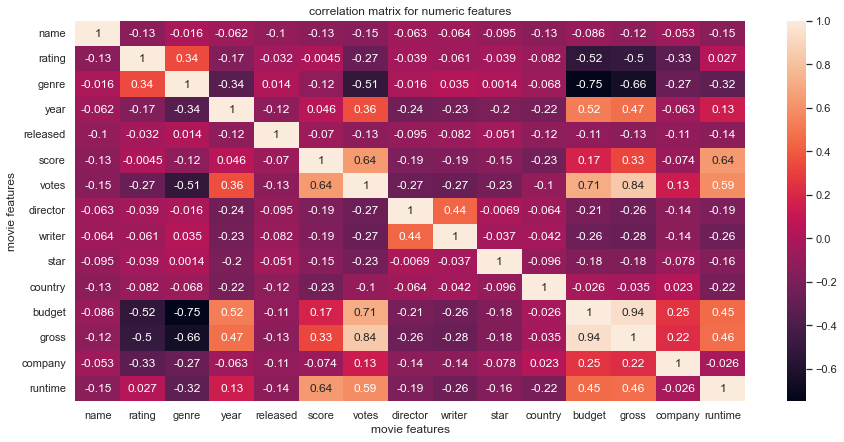

In [34]:
#numeric features

plt.figure(figsize=(15,7))
sns.heatmap(correlation, annot = True)

plt.title('correlation matrix for numeric features')
plt.xlabel('movie features')
plt.ylabel('movie features')

plt.show()

In [42]:
#sorting high and low correlaton

corr_pairs = correlation.unstack()
sorted_pairs = corr_pairs.sort_values()
high_corr = sorted_pairs[(sorted_pairs) > 0.5]
high_corr

year      budget      0.521879
budget    year        0.521879
votes     runtime     0.588107
runtime   votes       0.588107
score     runtime     0.636805
runtime   score       0.636805
votes     score       0.639468
score     votes       0.639468
budget    votes       0.714897
votes     budget      0.714897
gross     votes       0.839542
votes     gross       0.839542
budget    gross       0.941133
gross     budget      0.941133
name      name        1.000000
director  director    1.000000
gross     gross       1.000000
budget    budget      1.000000
country   country     1.000000
star      star        1.000000
writer    writer      1.000000
votes     votes       1.000000
score     score       1.000000
released  released    1.000000
year      year        1.000000
genre     genre       1.000000
rating    rating      1.000000
company   company     1.000000
runtime   runtime     1.000000
dtype: float64

### votes and budget have the highest correlation to gross earnings